<u>**Figure 1**</u>

Data fields are named according to the corresponding initial Froude number of the simulation. Except for the plane snapshots, each consists of time\-evolving horizontally averaged profiles of the different variables.



In [3]:
import cmocean
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as mticker
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.size' : 11}
plt.rcParams.update(rc)

In [4]:
xdim = 512
ydim = 673
z = np.linspace(0,14.28, 256)
x=np.linspace(0,28.56,512)
y = np.load('y.npy')
u_zy_slice_1 = np.load('u_zy_1.npy')
u_xz_slice_1 = np.load('u_xz_1.npy')

In [7]:
u_zy_slice_1.shape

(1121, 256)

In [8]:
th05 = np.load('th_05.npy')
dudy05 = np.load('dudy_05.npy')
u05 = np.load('u_05.npy')
v05 = np.load('v_05.npy')
w05 = np.load('w_05.npy')
time05 = np.load('t_05.npy')

In [9]:
th1 = np.load('th_1.npy')
dudy1 = np.load('dudy_1.npy')
u1 = np.load('u_1.npy')
v1 = np.load('v_1.npy')
w1 = np.load('w_1.npy')
time1 = np.load('t_1.npy')

In [10]:
th2 = np.load('th_2.npy')
dudy2 = np.load('dudy_2.npy')
u2 = np.load('u_2.npy')
v2 = np.load('v_2.npy')
w2 = np.load('w_2.npy')
time2 = np.load('t_2.npy')

In [11]:
dudz05 = np.gradient(u05,z,axis=1)
dudz1 = np.gradient(u1,z,axis=1)
dudz2 = np.gradient(u2,z,axis=1)
dvdz05 = np.gradient(v05,z,axis=1)
dvdz1 = np.gradient(v1,z,axis=1)
dvdz2 = np.gradient(v2,z,axis=1)


In [12]:
dudt05= np.gradient(u05[:], time05[:], axis=0)
dudt1= np.gradient(u1[:], time1[:], axis=0)
dudt2= np.gradient(u2[:], time2[:], axis=0)

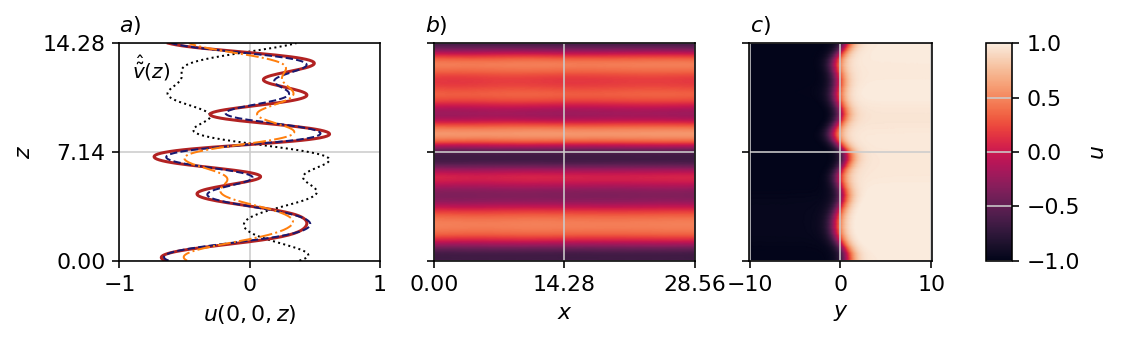

In [13]:
# sns.set_style("ticks")
# sns.color_palette('dark')
fig=plt.figure(figsize=(8,2))
gs=GridSpec(1,4, width_ratios = [1,1,0.7,0.1], wspace=0.3, hspace=0.3)
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1])
ax3=fig.add_subplot(gs[0,2]) 
axcbar = fig.add_subplot(gs[:,3]) 
l1, = ax1.plot( 10*v05[0],z, color='k', linewidth=1, linestyle='dotted')
ax1.set_ylabel('$z$')
ax1.annotate('$\\hat{\\tilde{v}}(z)$', (-0.9, 12), size=10)
ax1.annotate('$a)$', (-1,15), annotation_clip=False)
l2, = ax1.plot( u05[-25],z, color='firebrick', linestyle='-')
l3, = ax1.plot( u1[-25],z, color='midnightblue', linestyle='--', linewidth=1)
l4, = ax1.plot( u2[-25],z, color='tab:orange', linestyle='-.', linewidth=1)
ax1.set_ylim(0,14.28)
ax1.set_yticks([0, 7.14,14.28])
ax1.set_xlim(-1,1)
ax1.set_xlabel('$u(0,0,z)$')
a2 = ax3.pcolormesh(y[200:-200],z,u_zy_slice_1.T[:,200:-200], 
                    cmap='rocket', vmin=-1,vmax=1, shading='gouraud')
a3 = ax2.pcolormesh(x,z, u_xz_slice_1, vmin=-1,vmax=1, shading='gouraud',
                   cmap='rocket')
ax2.set_yticks([0,7.14,14.28])
ax2.annotate('$b)$', (-1,15), annotation_clip=False)
ax2.set_yticklabels([])
ax2.set_xticks([0,14.28, 28.56])
ax2.set_xlabel('$x$')
ax3.set_xticks([-10,0, 10])
ax3.set_yticks([0,7.14,14.28])
ax3.annotate('$c)$', (-10,15), annotation_clip=False)
ax3.set_yticklabels([])
ax3.set_xlabel('$y$')
cbar = fig.colorbar(a2, cax=axcbar, label='$u$')